# Title

**Exercise: 1 - Normal Distributions and Likelihood**

# Description

The goal of this exercise is to become comfortable with the normal distribution and the idea of the likelihood function.  This magnitude of the data is small so that you can focus on the understanding of the concepts.

# Instructions
- Do a few probability and density calculations for a normal distribution
- Calculate and plot the likelihood of a sample of just 3 observations.
- Determine the Maximum Likelihood Estimates.

# Hints:

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html" target="_blank">scipy.stats.norm.pdf()</a> : Evaluates the PDF of a normal distribution at a particular value of X

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html" target="_blank">scipy.stats.norm.cdf()</a> : Evaluates the CDF of a normal distribution to find: 
$$P\left(X\le x\right)$$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.stats import norm

(a) Let $X\sim N(500,75^2)$.  Determine $P(X\geq 600)$.

In [4]:
### edTest(test_norm_prob) ###
prob = 1-norm.cdf(600, loc=500, scale=75)
prob

0.09121121972586788

(b) Plotting the normal distribution of $X\sim N(500,75^2)$.

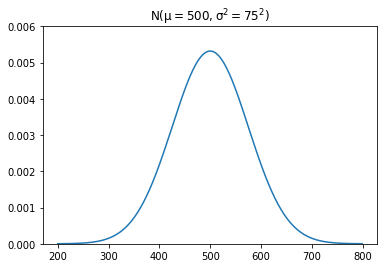

In [5]:
# define parameters
mu = 500
sigma = 75

# the 'dummy' x for plotting
x = np.arange(200,800)

# calculate the normal distribution at each value of x
prob = norm.pdf(x,mu,sigma)

# plot it
plt.plot(x, prob);
plt.title(r'$\mathrm{N(\mu=500, \sigma^2=75^2)}$')
plt.ylim((0,0.006))
plt.show()

**Question:** Does your answer to part (a) makes sense based on this curve?

(c) Calculating simple likelihoods

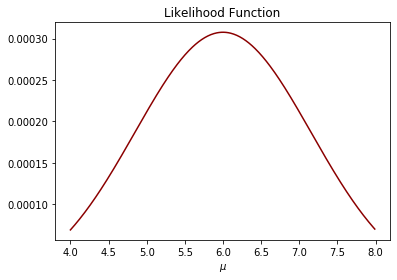

In [6]:
### edTest(test_likelihood) ###
# define the data set
x = [3,5,10]

# sigma is known to be 2, an estimate for mu
# is what we need to determine. Consider 
#the values (4, 4.01, 4.02, ..., 7.99).
sigma = 2
mu = np.arange(4, 8, 0.01)

# calculate the likelihood
like = norm.pdf(x[0], mu, sigma) * norm.pdf(x[1], mu, sigma) * norm.pdf(x[2], mu, sigma)

#plot it
plt.plot(mu, like, color="darkred");
plt.title('Likelihood Function')
plt.xlabel(r'$\mu$')
plt.show()

(d) Determine the maximum likelihood estimate for $\mu$.

In [7]:
### edTest(test_mle) ###
# determine which value of mu aligns with where 
# the maximum of the likelihood function is
mle = mu[np.argmax(like)]
mle

5.999999999999957

**Question:** How would you numerically maximize this function if both the mean and variance were unknown?  How would you visualize the likelihood function?

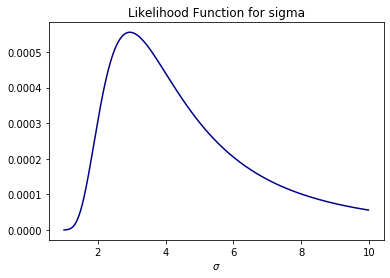

In [9]:
# Assume sigma is known, calculate the likelihood to determine the mean
# Then with the mean, find sigma with the max likelihood

max_mu =  mle
sigma = np.arange(1, 10, 0.01)

# calculate the likelihood
like_sigma = norm.pdf(x[0], max_mu, sigma) * norm.pdf(x[1], max_mu, sigma) * norm.pdf(x[2], max_mu, sigma)

# plot it
plt.plot(sigma, like_sigma, color="darkblue");
plt.title('Likelihood Function for sigma')
plt.xlabel(r'$\sigma$')
plt.show()

In [12]:
mle_sigma = sigma[np.argmax(like_sigma)]
mle_sigma

2.9400000000000017